# Basic Import

## Package Import

In [ ]:
# import necessary libraries and modules
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import time

: 

## Dataset Import 

In [ ]:
# load the Olivetti faces dataset
data = fetch_olivetti_faces()
X = data['data']
y = data['target']

: 

## Prepare train and test set

In [3]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=542)

# Statistical Learning

## Running the Model without PCA

### Linear Classfier

Out-sample Accuracy for logistic regression: 0.8
Time Comsumption: 0.7184991836547852 sec.


<Axes: >

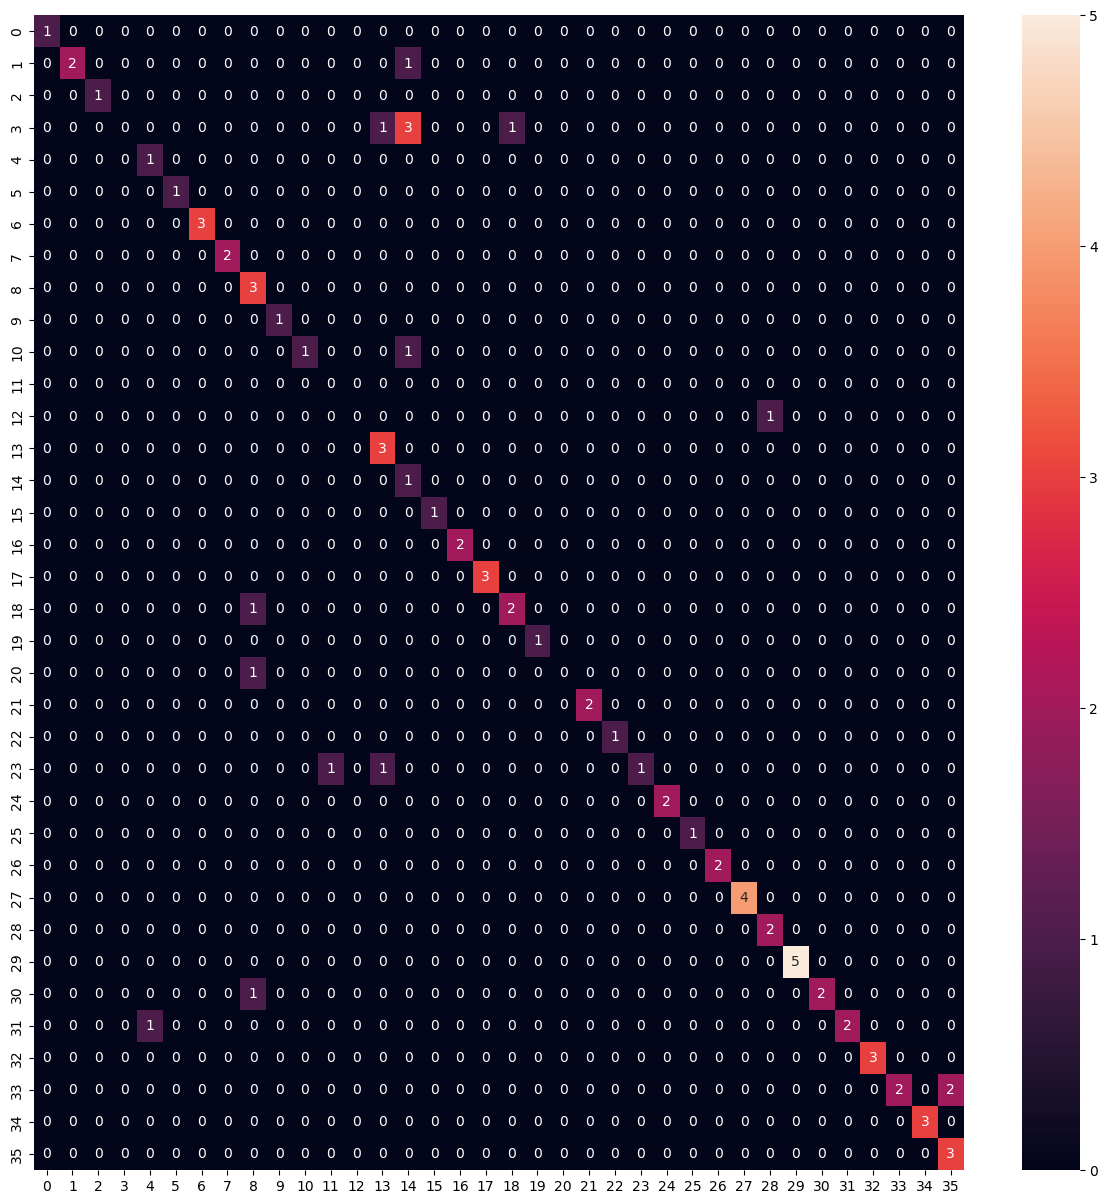

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

start = time.time()
# Create a logistic regression model


clf = SGDClassifier()

# Fit the model to the training data
clf.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
end = time.time()

print("Out-sample Accuracy for logistic regression:", accuracy)
print("Time Comsumption:", end - start, "sec.")

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(cm, annot=True, fmt='d', ax=ax)

### Logistic

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

start = time.time()
# Create a logistic regression model
clf = LogisticRegression(n_components=60)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
end = time.time()

print("Out-sample Accuracy for logistic regression:", accuracy)
print("Time Comsumption:", end - start, "sec.")

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(cm, annot=True, fmt='d', ax=ax)

TypeError: __init__() got an unexpected keyword argument 'n_components'

### LDA

Out-sample Accuracy for LDA for 5 components: 0.9875
Out-sample Accuracy for LDA for 10 components: 0.9875
Out-sample Accuracy for LDA for 15 components: 0.9875
Out-sample Accuracy for LDA for 20 components: 0.9875
Out-sample Accuracy for LDA for 25 components: 0.9875
Out-sample Accuracy for LDA for 30 components: 0.9875
Out-sample Accuracy for LDA for 35 components: 0.9875


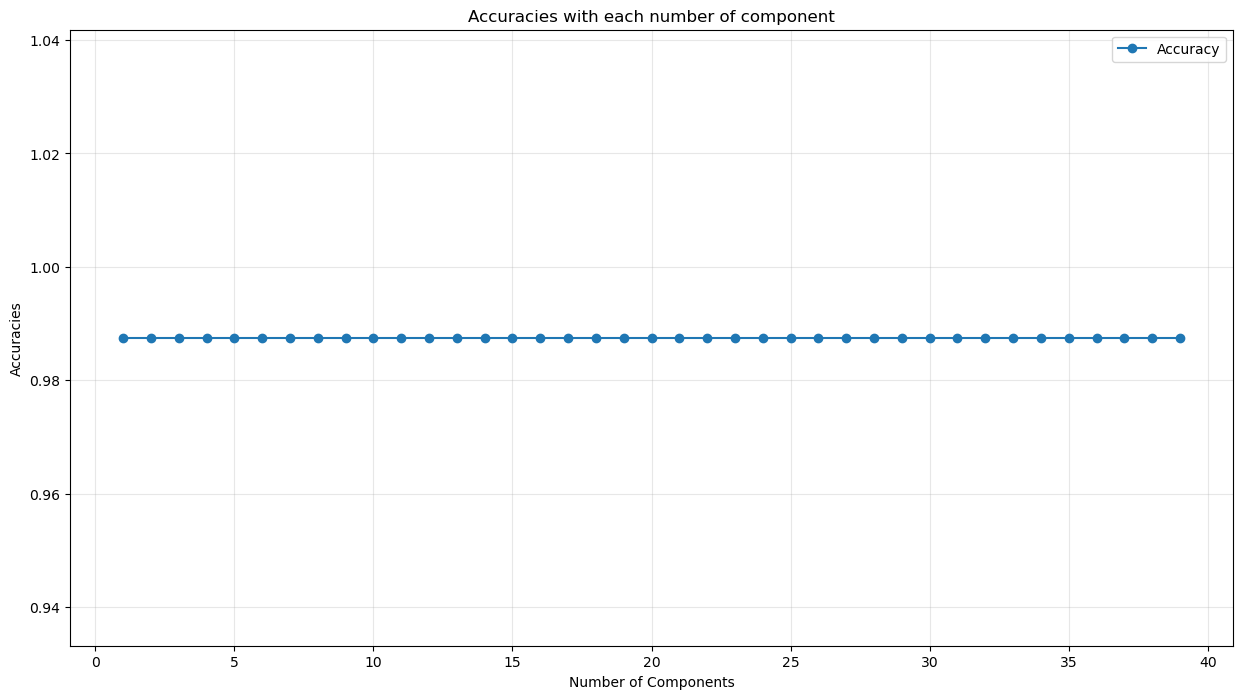

The best accuracy of the number of components: 0.9875


In [6]:
#find the best parameters
acc = []
for n in range(1, 40):
  lda = LinearDiscriminantAnalysis(n_components=n)
  lda.fit(X_train, y_train)
  y_pred = lda.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  if n % 5 == 0: 
    print("Out-sample Accuracy for LDA for", n, "components:", accuracy)
  
  acc.append(accuracy)
  accuracy = 0 
plt.figure(figsize=(15,8))
plt.title("Accuracies with each number of component")
plt.plot(range(1,40), acc, 'o-',  label = "Accuracy")
plt.ylabel("Accuracies")
plt.xlabel("Number of Components")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("The best accuracy of the number of components:", max(acc))

So basically all of those number of components have same performance so we are going to randomly pick a number ranged from 1 to 39 and see its performance. 

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

start = time.time()
# Create an instance of LDA
lda = LinearDiscriminantAnalysis(n_components=60)

# Train the LDA model
lda.fit(X_train, y_train)


# Make predictions on the test set
y_pred = lda.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

end = time.time()

# Print the accuracy
print("Out-sample Accuracy for LDA:", accuracy)
print("Time Comsumption:", end - start, "sec.")

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(cm, annot=True, fmt='d', ax=ax)


ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

## Running the Model with PCA

## PCA Visualization

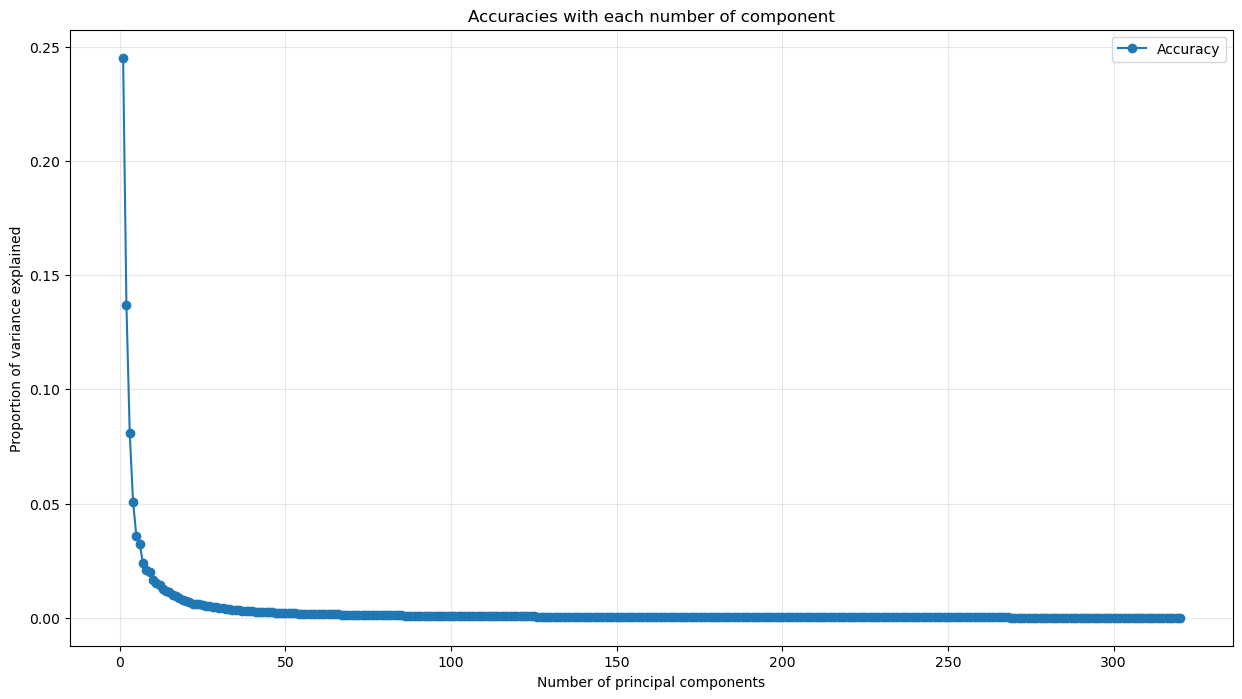

In [7]:
from sklearn.decomposition import PCA

# load the Olivetti faces dataset
data = fetch_olivetti_faces()
X = data['data']
y = data['target']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=542)

pca = PCA(n_components=320)
X_train_pca = pca.fit_transform(X_train)

# Apply PCA to the testing set
X_test_pca = pca.transform(X_test)

# visualizw results
plt.figure(figsize=(15,8))
plt.plot(range(1, pca.n_components_+1), pca.explained_variance_ratio_, 'o-', label = "Accuracy")
plt.title("Accuracies with each number of component")
plt.xlabel('Number of principal components')
plt.ylabel('Proportion of variance explained')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

We are going to try the number of components with 3, 5, 7, 10, 14, 20, 30 to see the performance of PCA. 

### Logistic with PCA

Number of components: 3 , Out-sample Accuracy for logistic regression with PCA: 0.2875
Time Comsumption: 0.18893718719482422 sec.

Number of components: 5 , Out-sample Accuracy for logistic regression with PCA: 0.5125
Time Comsumption: 0.1630878448486328 sec.

Number of components: 7 , Out-sample Accuracy for logistic regression with PCA: 0.6375
Time Comsumption: 0.22095870971679688 sec.

Number of components: 10 , Out-sample Accuracy for logistic regression with PCA: 0.8
Time Comsumption: 0.1944739818572998 sec.

Number of components: 14 , Out-sample Accuracy for logistic regression with PCA: 0.8875
Time Comsumption: 0.2274312973022461 sec.

Number of components: 20 , Out-sample Accuracy for logistic regression with PCA: 0.9375
Time Comsumption: 0.25757741928100586 sec.

Number of components: 30 , Out-sample Accuracy for logistic regression with PCA: 0.9625
Time Comsumption: 0.3620636463165283 sec.

Number of components: 60 , Out-sample Accuracy for logistic regression with PCA: 0.975

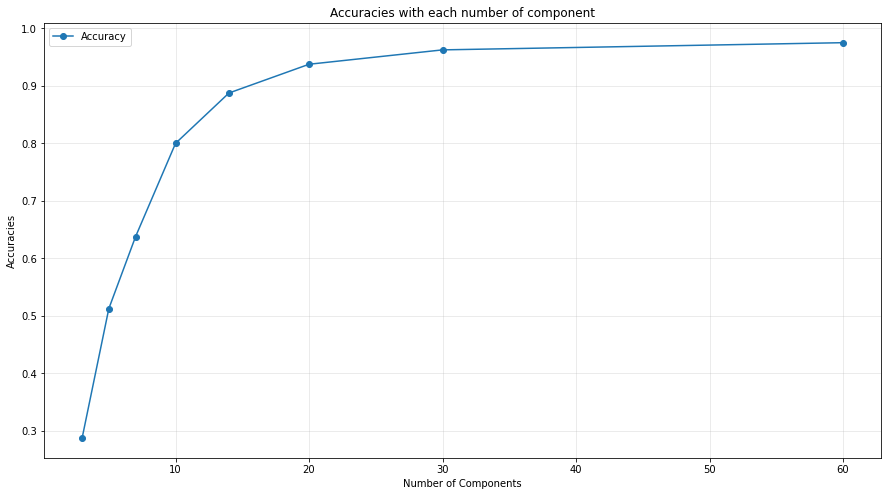

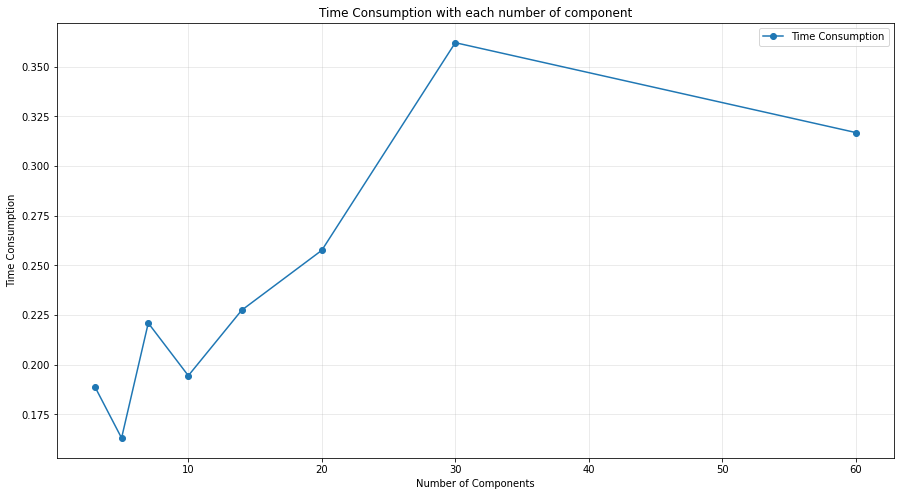

In [ ]:
acc = []
time_comp = []
for n in [3, 5, 7, 10, 14, 20, 30,60]:
  start = time.time()
  pca = PCA(n_components=n)
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)
  clf = LogisticRegression()
  clf.fit(X_train_pca, y_train)
  y_pred = clf.predict(X_test_pca)
  accuracy = accuracy_score(y_test, y_pred)
  end = time.time()
  print("Number of components:", n, ", Out-sample Accuracy for logistic regression with PCA:", accuracy)
  print("Time Comsumption:", end - start, "sec.\n")
  acc.append(accuracy)
  time_comp.append(end - start)

plt.figure(figsize=(15,8))
plt.plot([3, 5, 7, 10, 14, 20, 30,60], acc, 'o-', label = 'Accuracy')
plt.ylabel("Accuracies")
plt.xlabel("Number of Components")
plt.title("Accuracies with each number of component")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(15,8))
plt.plot([3, 5, 7, 10, 14, 20, 30,60], time_comp, 'o-', label = 'Time Consumption')
plt.ylabel("Time Consumption")
plt.xlabel("Number of Components")
plt.title("Time Consumption with each number of component")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

It seemed like the differences among time consumptions are not significant so we will try the number of conponents that have largest accuracy. 

Number of components: 
Out-sample Accuracy for logistic regression with PCA: 0.975
Time Comsumption: 0.1810147762298584 sec.


<Axes: >

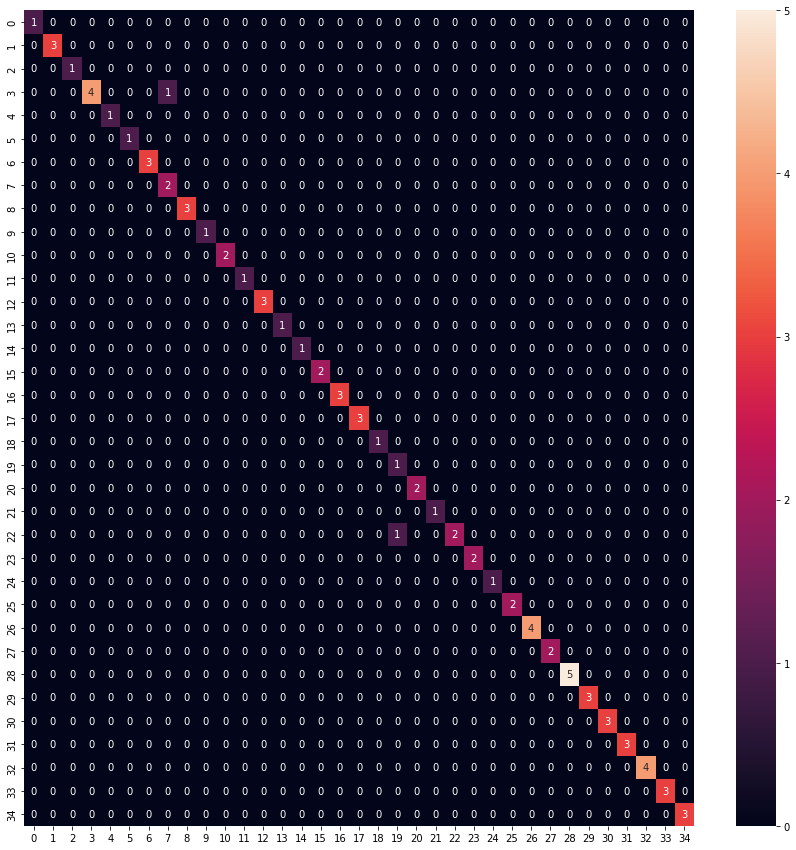

In [ ]:
start = time.time()

#Implementing PCA
pca = PCA(n_components=60)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a logistic regression model
clf = LogisticRegression()

# Fit the model to the training data
clf.fit(X_train_pca, y_train)

# Use the model to make predictions on the testing data
y_pred = clf.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
end = time.time()

print("Number of components: ")
print("Out-sample Accuracy for logistic regression with PCA:", accuracy)
print("Time Comsumption:", end - start, "sec.")

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(cm, annot=True, fmt='d', ax=ax)

In [ ]:
len(X_train_pca[0])

60

### LDA with PCA

In [ ]:
acc = []
time_comp = []
for n in [3, 5, 7, 10, 14, 20, 30,60]:
  start = time.time()
  pca = PCA(n_components=n)
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)
  lda = LinearDiscriminantAnalysis(n_components=n-2)
  lda.fit(X_train_pca, y_train)
  y_pred = lda.predict(X_test_pca)
  accuracy = accuracy_score(y_test, y_pred)
  end = time.time()
  print("Number of components:", n, ", Out-sample Accuracy for LDA with PCA:", accuracy)
  print("Time Comsumption:", end - start, "sec.\n")
  acc.append(accuracy)
  time_comp.append(end - start)

plt.figure(figsize=(15,8))
plt.plot([3, 5, 7, 10, 14, 20, 30,60], acc, 'o-', label = 'Accuracy')
plt.ylabel("Accuracies")
plt.xlabel("Number of Components")
plt.title("Accuracies with each number of component")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(15,8))
plt.plot([3, 5, 7, 10, 14, 20, 30,60], time_comp, 'o-', label = 'Time Consumption')
plt.ylabel("Time Consumption")
plt.xlabel("Number of Components")
plt.title("Time Consumption with each number of component")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Number of components: 3 , Out-sample Accuracy for LDA with PCA: 0.2875
Time Comsumption: 0.06358003616333008 sec.

Number of components: 5 , Out-sample Accuracy for LDA with PCA: 0.5625
Time Comsumption: 0.05475425720214844 sec.

Number of components: 7 , Out-sample Accuracy for LDA with PCA: 0.7
Time Comsumption: 0.1701970100402832 sec.

Number of components: 10 , Out-sample Accuracy for LDA with PCA: 0.7875
Time Comsumption: 0.1102752685546875 sec.

Number of components: 14 , Out-sample Accuracy for LDA with PCA: 0.8875
Time Comsumption: 0.09329795837402344 sec.

Number of components: 20 , Out-sample Accuracy for LDA with PCA: 0.9125
Time Comsumption: 0.11858344078063965 sec.

Number of components: 30 , Out-sample Accuracy for LDA with PCA: 0.95
Time Comsumption: 0.11864447593688965 sec.



ValueError: ignored

The time consumption will increase nearly twice as the number of components grown from 3 to 30. However, it seemed like the accuracies cease growing since the number of components reached 15. Thus we try number of components with 15 following. 

Number of conponents: 15
Out-sample Accuracy for LDA: 0.7
Time Comsumption: 0.094329833984375 sec.


<Axes: >

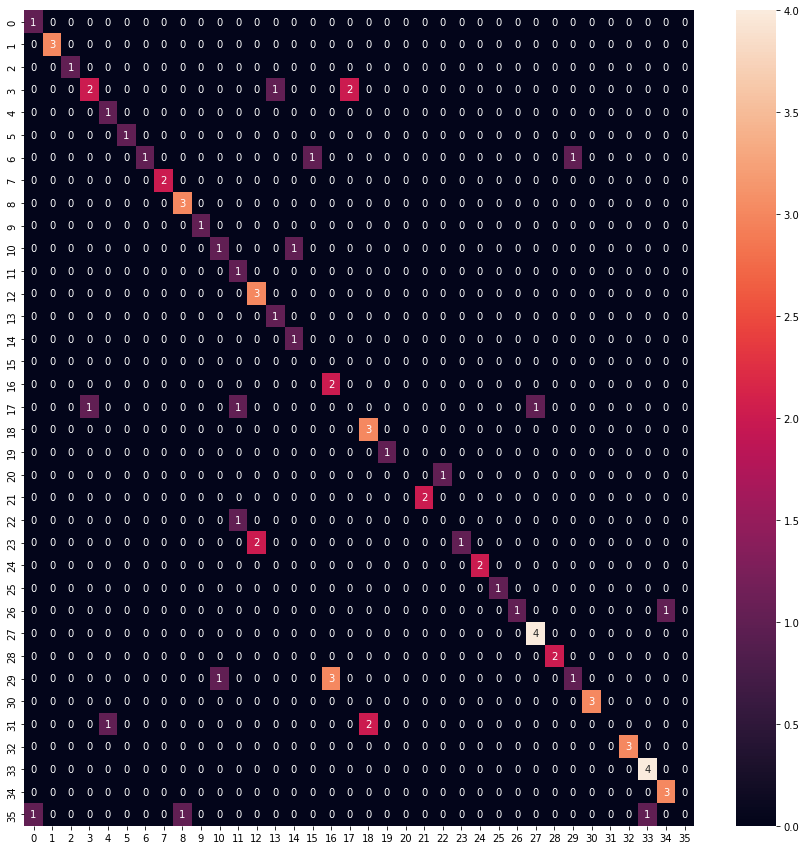

In [ ]:
start = time.time()

#PCA
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create an instance of LDA
lda = LinearDiscriminantAnalysis(n_components=5)

# Train the LDA model
lda.fit(X_train_pca, y_train)


# Make predictions on the test set
y_pred = lda.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

end = time.time()

# Print the accuracy
print("Number of conponents: 15")
print("Out-sample Accuracy for LDA:", accuracy)
print("Time Comsumption:", end - start, "sec.")

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(cm, annot=True, fmt='d', ax=ax)

# Deep Learning: CNN

Epoch 1/60
10/10 [==============================] - 3s 184ms/step - loss: 3.7017 - accuracy: 0.0250 - val_loss: 3.6941 - val_accuracy: 0.0000e+00
Epoch 2/60
10/10 [==============================] - 2s 163ms/step - loss: 3.6896 - accuracy: 0.0312 - val_loss: 3.7032 - val_accuracy: 0.0000e+00
Epoch 3/60
10/10 [==============================] - 2s 162ms/step - loss: 3.6858 - accuracy: 0.0281 - val_loss: 3.7329 - val_accuracy: 0.0000e+00
Epoch 4/60
10/10 [==============================] - 2s 162ms/step - loss: 3.6843 - accuracy: 0.0188 - val_loss: 3.7723 - val_accuracy: 0.0000e+00
Epoch 5/60
10/10 [==============================] - 2s 165ms/step - loss: 3.6782 - accuracy: 0.0250 - val_loss: 3.7754 - val_accuracy: 0.0125
Epoch 6/60
10/10 [==============================] - 2s 168ms/step - loss: 3.6764 - accuracy: 0.0250 - val_loss: 3.7597 - val_accuracy: 0.0000e+00
Epoch 7/60
10/10 [==============================] - 2s 239ms/step - loss: 3.6720 - accuracy: 0.0344 - val_loss: 3.8252 - val_acc

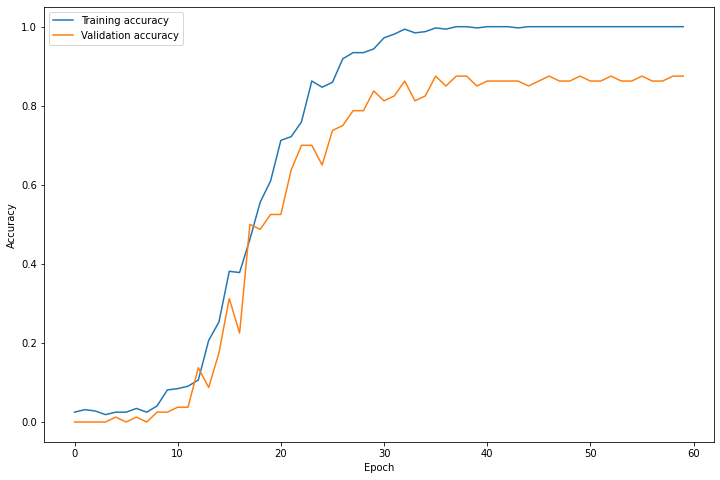

In [ ]:
# Import the necessary libraries
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Load the Olivetti faces dataset
dataset = fetch_olivetti_faces()
X = dataset.data.reshape(-1, 64, 64, 1)  # Reshape the data into images
y = dataset.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=542)

start = time.time()
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(40, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test))


# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

end = time.time()
print('Out-sample Test accuracy for CNN:', test_acc)
print("Time Comsumption:", end - start, "sec.")

# Plot the training and validation accuracy history
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/60
10/10 [==============================] - 2s 110ms/step - loss: 3.7420 - accuracy: 0.0219 - val_loss: 3.6899 - val_accuracy: 0.0000e+00
Epoch 2/60
10/10 [==============================] - 1s 52ms/step - loss: 3.6887 - accuracy: 0.0312 - val_loss: 3.6911 - val_accuracy: 0.0000e+00
Epoch 3/60
10/10 [==============================] - 1s 52ms/step - loss: 3.6952 - accuracy: 0.0250 - val_loss: 3.6922 - val_accuracy: 0.0000e+00
Epoch 4/60
10/10 [==============================] - 0s 50ms/step - loss: 3.6882 - accuracy: 0.0344 - val_loss: 3.7021 - val_accuracy: 0.0000e+00
Epoch 5/60
10/10 [==============================] - 0s 49ms/step - loss: 3.6893 - accuracy: 0.0312 - val_loss: 3.6942 - val_accuracy: 0.0000e+00
Epoch 6/60
10/10 [==============================] - 1s 50ms/step - loss: 3.6877 - accuracy: 0.0156 - val_loss: 3.6952 - val_accuracy: 0.0000e+00
Epoch 7/60
10/10 [==============================] - 1s 50ms/step - loss: 3.6874 - accuracy: 0.0312 - val_loss: 3.6963 - val_accur

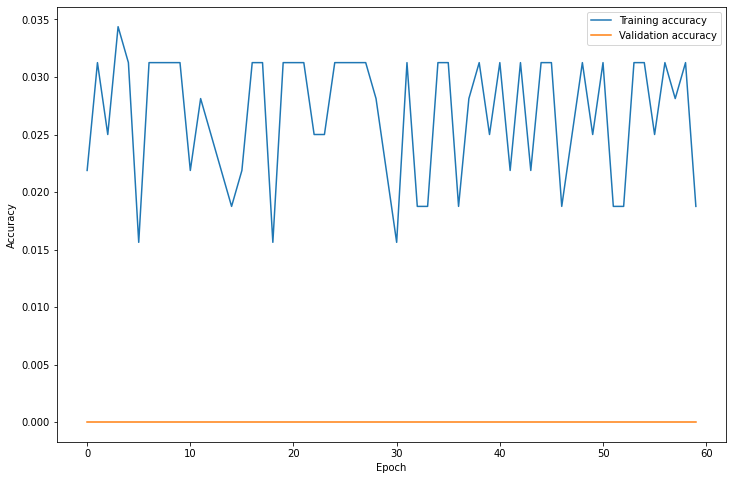

In [ ]:
# Import the necessary libraries
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Load the Olivetti faces dataset
dataset = fetch_olivetti_faces()
X = dataset.data.reshape(-1, 64, 64, 1)  # Reshape the data into images
y = dataset.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=542)

start = time.time()
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(40, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test))


# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

end = time.time()
print('Out-sample Test accuracy for CNN:', test_acc)
print("Time Comsumption:", end - start, "sec.")

# Plot the training and validation accuracy history
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/60
10/10 [==============================] - 2s 158ms/step - loss: 3.7099 - accuracy: 0.0375 - val_loss: 3.7026 - val_accuracy: 0.0125
Epoch 2/60
10/10 [==============================] - 1s 110ms/step - loss: 3.6805 - accuracy: 0.0437 - val_loss: 3.6840 - val_accuracy: 0.0000e+00
Epoch 3/60
10/10 [==============================] - 1s 107ms/step - loss: 3.6549 - accuracy: 0.0437 - val_loss: 3.6726 - val_accuracy: 0.0375
Epoch 4/60
10/10 [==============================] - 1s 110ms/step - loss: 3.6040 - accuracy: 0.0562 - val_loss: 3.6325 - val_accuracy: 0.0750
Epoch 5/60
10/10 [==============================] - 1s 107ms/step - loss: 3.4685 - accuracy: 0.0938 - val_loss: 3.5054 - val_accuracy: 0.0875
Epoch 6/60
10/10 [==============================] - 1s 110ms/step - loss: 3.2298 - accuracy: 0.1594 - val_loss: 3.3890 - val_accuracy: 0.1375
Epoch 7/60
10/10 [==============================] - 1s 112ms/step - loss: 2.8651 - accuracy: 0.3594 - val_loss: 3.0675 - val_accuracy: 0.2000
Ep

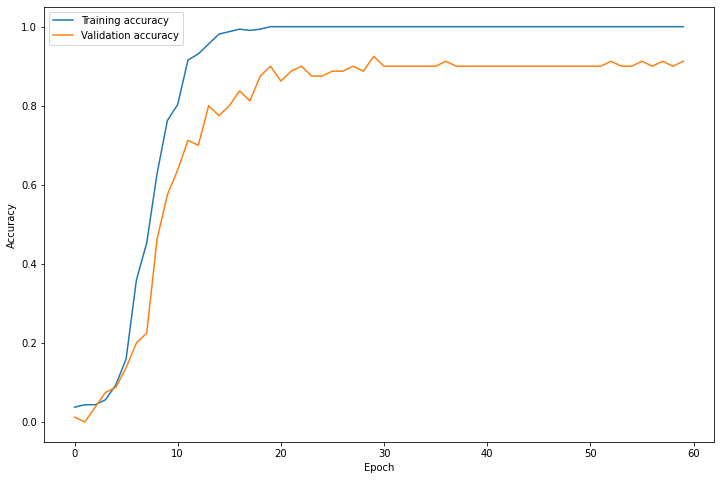

In [ ]:
# Import the necessary libraries
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Load the Olivetti faces dataset
dataset = fetch_olivetti_faces()
X = dataset.data.reshape(-1, 64, 64, 1)  # Reshape the data into images
y = dataset.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=542)

start = time.time()
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(40, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test))


# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

end = time.time()
print('Out-sample Test accuracy for CNN:', test_acc)
print("Time Comsumption:", end - start, "sec.")

# Plot the training and validation accuracy history
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/60
10/10 [==============================] - 3s 192ms/step - loss: 3.7048 - accuracy: 0.0219 - val_loss: 3.6955 - val_accuracy: 0.0125
Epoch 2/60
10/10 [==============================] - 1s 141ms/step - loss: 3.6860 - accuracy: 0.0281 - val_loss: 3.7139 - val_accuracy: 0.0125
Epoch 3/60
10/10 [==============================] - 1s 142ms/step - loss: 3.6823 - accuracy: 0.0219 - val_loss: 3.7519 - val_accuracy: 0.0250
Epoch 4/60
10/10 [==============================] - 2s 170ms/step - loss: 3.6803 - accuracy: 0.0250 - val_loss: 3.7599 - val_accuracy: 0.0125
Epoch 5/60
10/10 [==============================] - 1s 141ms/step - loss: 3.6692 - accuracy: 0.0531 - val_loss: 3.7421 - val_accuracy: 0.0125
Epoch 6/60
10/10 [==============================] - 1s 140ms/step - loss: 3.6602 - accuracy: 0.0375 - val_loss: 3.7241 - val_accuracy: 0.0125
Epoch 7/60
10/10 [==============================] - 1s 141ms/step - loss: 3.6398 - accuracy: 0.0375 - val_loss: 3.7427 - val_accuracy: 0.0250
Epoch 

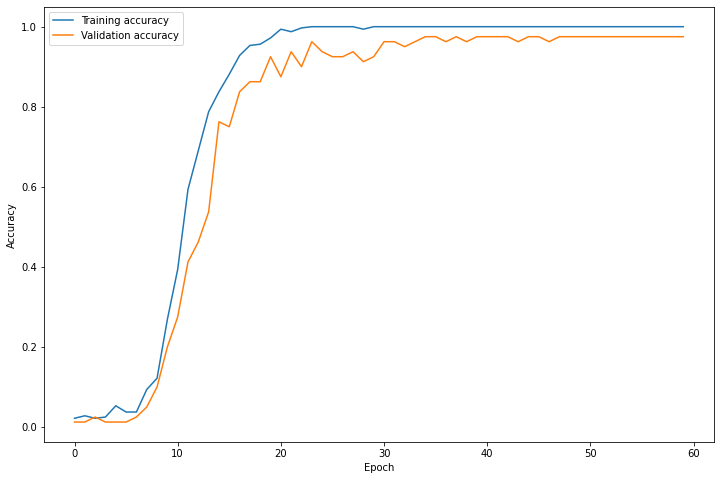

In [ ]:
# Import the necessary libraries
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Load the Olivetti faces dataset
dataset = fetch_olivetti_faces()
X = dataset.data.reshape(-1, 64, 64, 1)  # Reshape the data into images
y = dataset.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=542)

start = time.time()
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(40, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test))


# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

end = time.time()
print('Out-sample Test accuracy for CNN:', test_acc)
print("Time Comsumption:", end - start, "sec.")

# Plot the training and validation accuracy history
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
